<h3>Data Analysis of Censitary Sector Population of 2010 and 2022 Census - Palhoça City, Brazil </h3>

In this notebook I'm going to analyze the data of 2010 and 2022 census from Palhoça City, Brazil.

The notebook is subdivided in this structure:

* Data importing;
* Data analysis;
* Data transforming;
* Data visualization through the maps.


<h3>Data Importing</h3>



In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# defining the dataframes:


# preliminarly data from 2022 census:
df22 = '/kaggle/input/10s-and-20s-brazilian-census-data-palhoa-city/cs_palhoca_22.parquet'

# data from 2010 census:
df10 = '/kaggle/input/10s-and-20s-brazilian-census-data-palhoa-city/cs_palhoca_10.parquet'

<h3>Data Analysis</h3>


In [3]:
# initializng the spatial analysis troght the map plotting

# usign the read_parquet to read the lines of Parquet file.

sa_df22 = gpd.read_parquet(df22)

sa_df22.head(n=5)

# The column with the people number of each censitary sector is 'v0001'

,CD_SETOR,AREA_KM2,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,...,CD_CONCURB,NM_CONCURB,v0001,v0002,v0003,v0004,v0005,v0006,v0007,geometry
0,421190005000001P,0.285263,4,Sul,42,Santa Catarina,4211900,Palhoça,421190005,Palhoça,...,4205407,Florianópolis/SC,635,301,301,0,2.360595,4.832714,269,"MULTIPOLYGON (((-48.66777 -27.64535, -48.66938..."
1,421190005000002P,0.686197,4,Sul,42,Santa Catarina,4211900,Palhoça,421190005,Palhoça,...,4205407,Florianópolis/SC,488,225,224,1,2.515464,6.185567,194,"MULTIPOLYGON (((-48.66179 -27.64491, -48.66185..."
2,421190005000004P,0.221026,4,Sul,42,Santa Catarina,4211900,Palhoça,421190005,Palhoça,...,4205407,Florianópolis/SC,1132,515,515,0,2.521158,2.895323,449,"MULTIPOLYGON (((-48.66802 -27.65062, -48.66780..."
3,421190005000005P,0.204106,4,Sul,42,Santa Catarina,4211900,Palhoça,421190005,Palhoça,...,4205407,Florianópolis/SC,1126,492,492,0,2.674584,2.375297,421,"MULTIPOLYGON (((-48.67153 -27.65681, -48.67058..."
4,421190005000006P,1.214972,4,Sul,42,Santa Catarina,4211900,Palhoça,421190005,Palhoça,...,4205407,Florianópolis/SC,1130,498,498,0,2.646370,1.873536,427,"MULTIPOLYGON (((-48.66886 -27.65853, -48.66886..."


In [4]:
# analyzing the data type of the GeoParquet file

print(sa_df22.dtypes)

# great! the v0001 column is a int64 type

CD_SETOR        object
AREA_KM2        object
CD_REGIAO       object
NM_REGIAO       object
CD_UF           object
NM_UF           object
CD_MUN          object
NM_MUN          object
CD_DIST         object
NM_DIST         object
CD_SUBDIST      object
NM_SUBDIST      object
CD_MICRO        object
NM_MICRO        object
CD_MESO         object
NM_MESO         object
CD_RGI          object
NM_RGI          object
CD_RGINT        object
NM_RGINT        object
CD_CONCURB      object
NM_CONCURB      object
v0001            int64
v0002            int64
v0003            int64
v0004            int64
v0005           object
v0006           object
v0007            int64
geometry      geometry
dtype: object


In [5]:
# initializng the spatial analysis troght the map plotting

# usign the read_parquet to read the lines of Parquet file.

sa_df10 = gpd.read_parquet(df10)

sa_df10.head(n=5)

# The column with the people number of each censitary sector is 'v0001'

,id,cd_geocodi,tipo,nm_bairro,cd_geocods,cd_geocodd,cd_geocodm,nm_municip,cod_setor,v0001,geometry
0,52765,4.211900e+14,URBANO,None,42119000500,421190005,4211900,PALHOÇA,4.211900e+14,670.0,"MULTIPOLYGON (((-48.65515 -27.65566, -48.65604..."
1,52953,4.211900e+14,URBANO,None,42119000500,421190005,4211900,PALHOÇA,4.211900e+14,678.0,"MULTIPOLYGON (((-48.71135 -27.63933, -48.71141..."
2,52991,4.211900e+14,URBANO,None,42119000500,421190005,4211900,PALHOÇA,4.211900e+14,704.0,"MULTIPOLYGON (((-48.70565 -27.64222, -48.70593..."
3,52898,4.211900e+14,URBANO,Ponte do Imaruim,42119000500,421190005,4211900,PALHOÇA,4.211900e+14,1004.0,"MULTIPOLYGON (((-48.65032 -27.62422, -48.65020..."
4,52938,4.211900e+14,URBANO,None,42119000500,421190005,4211900,PALHOÇA,4.211900e+14,789.0,"MULTIPOLYGON (((-48.69124 -27.64901, -48.69285..."


In [6]:
# analyzing the data type of the GeoParquet file

print(sa_df10.dtypes)

# the v0001 column is object. For this, I will convert it in a int column:

id              object
cd_geocodi     float64
tipo            object
nm_bairro       object
cd_geocods      object
cd_geocodd      object
cd_geocodm      object
nm_municip      object
cod_setor      float64
v0001          float64
geometry      geometry
dtype: object


<h3>Data Transforming</h3>


In [7]:
# now I change the type from float to int

sa_df10['v0001'] = sa_df10['v0001'].astype('int')

print(sa_df10.dtypes)

# great! both the data are normalized!

id              object
cd_geocodi     float64
tipo            object
nm_bairro       object
cd_geocods      object
cd_geocodd      object
cd_geocodm      object
nm_municip      object
cod_setor      float64
v0001            int64
geometry      geometry
dtype: object


<h3>Data Visualization</h3>


In [8]:
# let's calculate the number of people whose lives in Palhoça on 2022:

habsum22 = sa_df22['v0001'].sum()
print(f'The number of people whose live in Palhoça on 2022 are: {habsum22}')

habsum10= sa_df10['v0001'].sum()
print(f'The number of people whose lived in Palhoça on 2010 are: {habsum10}')

# the difference:
difference = habsum22 - habsum10
print(f'The people growing in 12 years range are: {difference}')

# the growing percentage is?
percentage = round((difference / habsum10) * 100,2)

print(f'The percentage growing in 12 years range are: {percentage}%')

The number of people whose live in Palhoça on 2022 are: 222570
The number of people whose lived in Palhoça on 2010 are: 136802
The people growing in 12 years range are: 85768
The percentage growing in 12 years range are: 62.69%


<Axes: >

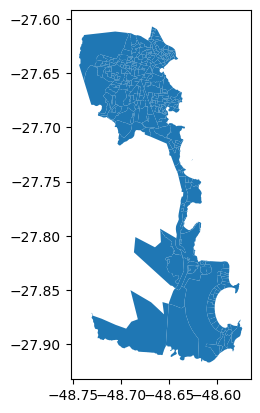

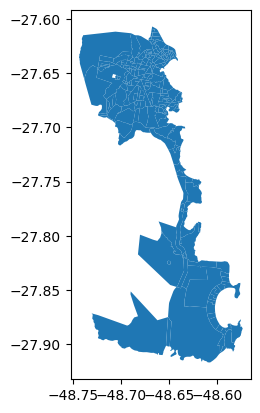

In [9]:
# now i will do a first plot of our spatial data:

sa_df22.plot()

sa_df10.plot()

# the data is solid

<h3>Using the  to represent the data</h3>

Predefined intervals are useful when there is a specific requirement or standard that needs to be followed, such as when the data needs to be compared against a set of predetermined thresholds or categories.

Using predefined intervals, I ensure that the data is categorized according to specific criteria, making it easier to interpret and compare across different datasets or maps. Thi is useful in situations where consistency in data representation is important, such as in policy-making or reporting.

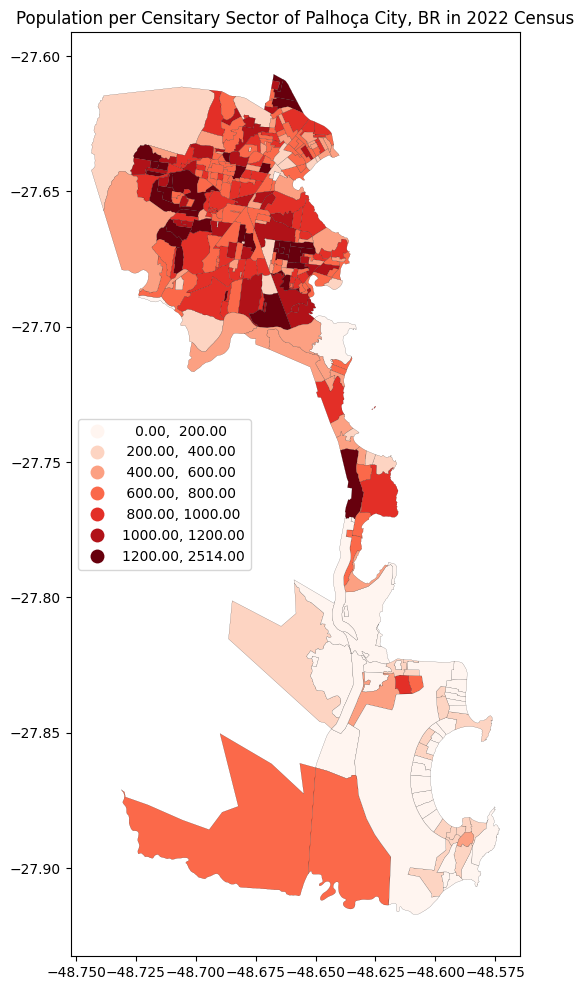

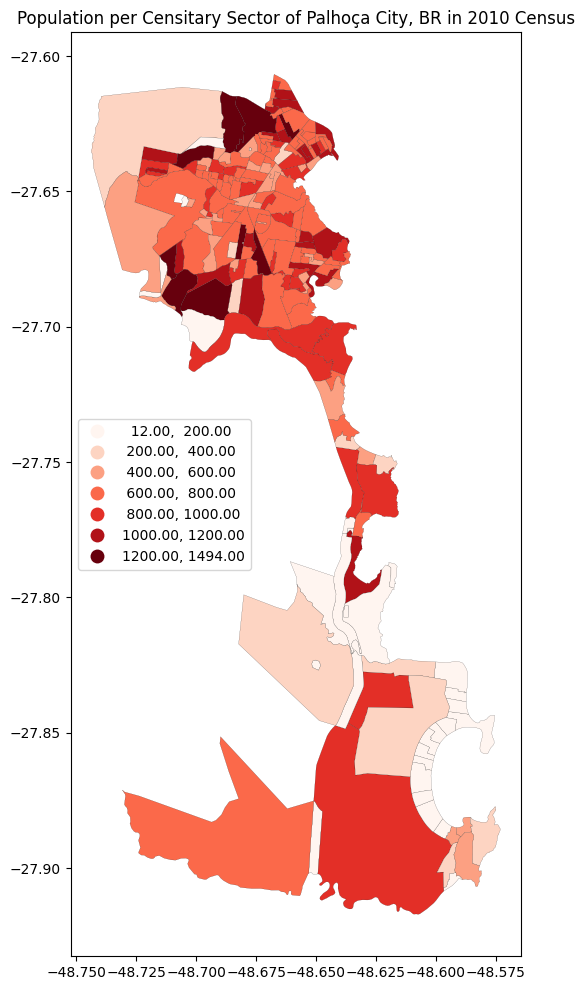

In [10]:
# ploting the maps

bins = [200, 400, 600, 800, 1000, 1200]  # defining the intervals

# Map plot 2022
fig, ax = plt.subplots(figsize=(8, 12))
sa_df22.plot(column='v0001', ax=ax, legend=True, cmap='Reds', scheme='UserDefined', classification_kwds={'bins': bins}, legend_kwds={'loc': 'center left'}, edgecolor='black', linewidth=0.1)
plt.title('Population per Censitary Sector of Palhoça City, BR in 2022 Census')
plt.savefig('map_plot_2022.png')
plt.show()


# Map plot 2010
fig, ax = plt.subplots(figsize=(8, 12))
sa_df10.plot(column='v0001', ax=ax, legend=True, cmap='Reds', scheme='UserDefined', classification_kwds={'bins': bins}, legend_kwds={'loc': 'center left'}, edgecolor='black', linewidth=0.1)
plt.title('Population per Censitary Sector of Palhoça City, BR in 2010 Census')
plt.savefig('map_plot_2010.png')
plt.show()


<h3>Conclusions </h3>

Besides the growth of in 12 years of 85768 people or 62.69%, the number of census sector grew too.

On the north portion of the city, we can see the multiplication of the census sectors, indicating which the place, receives more inhabitants.

Through to the map color, it's possible to observe the dark tons of red on the north of the city, corroborating the analysis of that place receives more people.

